#Trabalho


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
dados = pd.read_excel('Diabetes.xlsx')
display(dados)

,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade,Resultado
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2288.00,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [ ]:
describe_option = pd.options.display.float_format = '{:.2f}'.format
display(dados.describe())

,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade,Resultado
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,81.63,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,327.91,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2329.00,81.00,1.00


,Gravidezes,Glicose,Pressão Arterial,Espessura da Pele,Insulina,IMC,Diabetes-Pedigree,Idade,Resultado
Gravidezes,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.01,0.54,0.22
Glicose,0.13,1.00,0.15,0.06,0.33,0.22,0.12,0.26,0.47
Pressão Arterial,0.14,0.15,1.00,0.21,0.09,0.28,0.06,0.24,0.07
Espessura da Pele,-0.08,0.06,0.21,1.00,0.44,0.39,0.08,-0.11,0.07
Insulina,-0.07,0.33,0.09,0.44,1.00,0.20,0.10,-0.04,0.13
IMC,0.02,0.22,0.28,0.39,0.20,1.00,0.06,0.04,0.29
Diabetes-Pedigree,-0.01,0.12,0.06,0.08,0.10,0.06,1.00,0.03,0.11
Idade,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Resultado,0.22,0.47,0.07,0.07,0.13,0.29,0.11,0.24,1.00


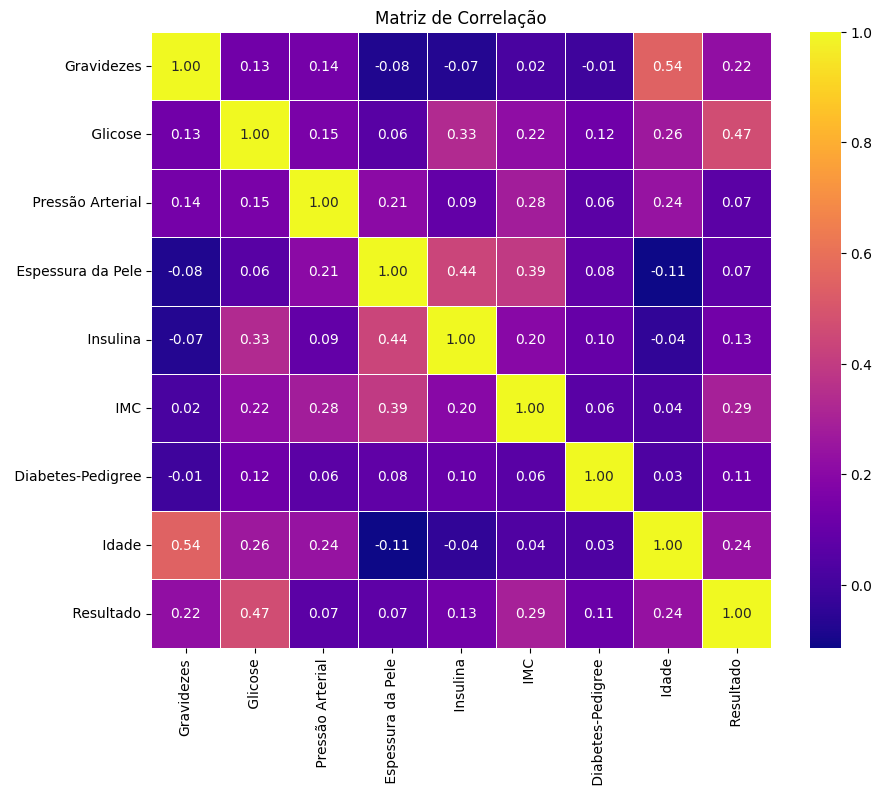

In [ ]:
matriz_correlacao = dados.corr()
display(matriz_correlacao)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='plasma', fmt = ".2f", linewidths= 0.5)
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
# dividindo os dados em conjunto de treinmaneto e teste
x = dados.iloc[:, 1:8].values
y = dados.iloc[:, 8].values

# Dividindo em treino (80%) e teste (20%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=2)

# Criando o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state = 42, max_depth = 4)
modelo.fit(x_treino, y_treino)

# Previsões
y_predicao = modelo.predict(x_teste)

#Métricas de Avaliação

* **Descrição:**

  * **Acurácia:** Esse cálculo é a proporção de previsões corretas em relação ao total de previsões.



  * **Matriz de confusão:** Exibe como as previsões do modelo estão distribuídas entre as classes reais.
    * Cada linha da matriz representa as instâncias da classe real.
    * Cada coluna representa as previsões feitas pelo modelo.
    * A diagonal da matriz representa as previsões corretas (valores reais iguais às previsões), e os outros valores indicam erros.

Acurácia: 0.75


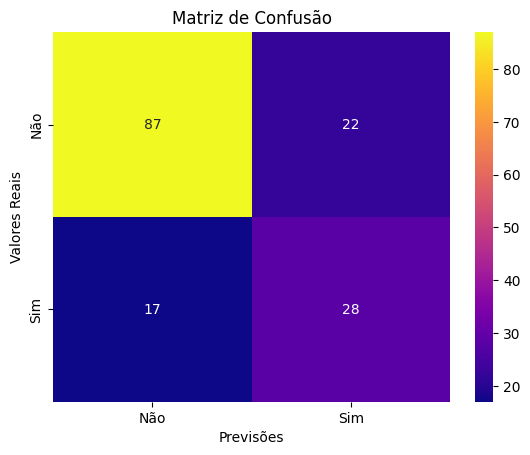

In [ ]:
# Medidas de desempenho
Acuracia = accuracy_score(y_teste, y_predicao)
print(f"Acurácia: {Acuracia:.2f}")

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_predicao)

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='plasma', xticklabels=["Não", "Sim"], yticklabels = ["Não", "Sim"])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

AUC: 0.80


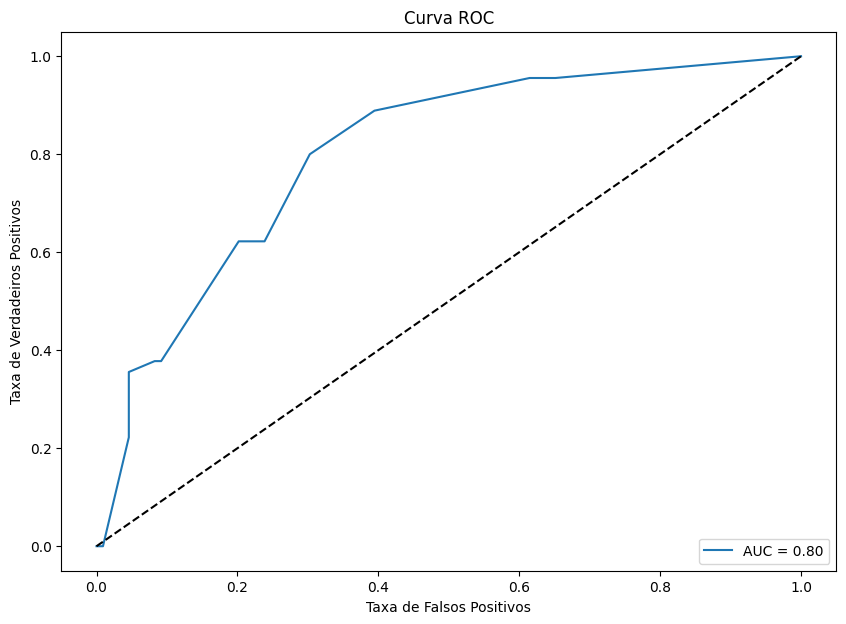

In [ ]:
# Calcular ROC e AUC
fpr, tpr, _ = roc_curve(y_teste, modelo.predict_proba(x_teste)[:,1])
AUC = auc(fpr, tpr)
print(f'AUC: {AUC:.2f}')
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {AUC:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ver as metricas
from sklearn.metrics import classification_report;
print(classification_report(y_teste, y_previsoes));

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       109
           1       0.76      0.49      0.59        45

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.79       154



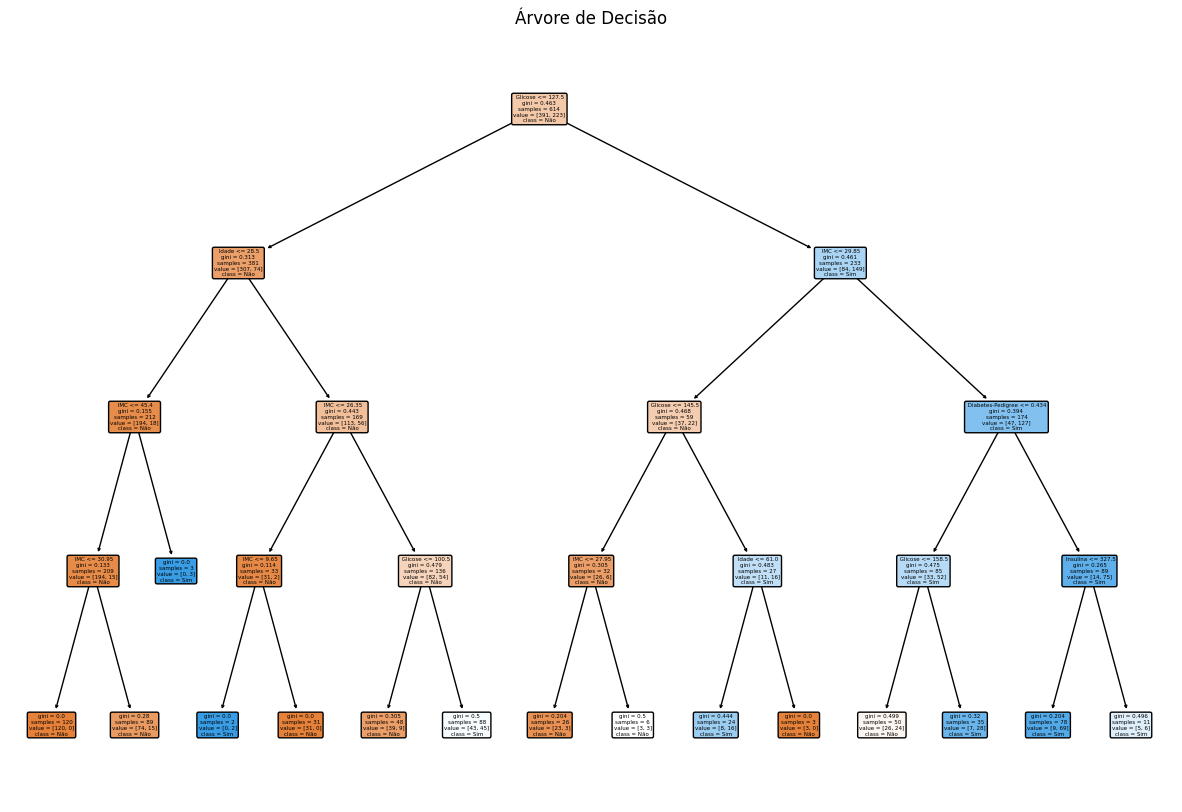

In [ ]:
# Plotando a Árvore de Decisão

plt.figure(figsize=(15, 10)) # Define o tamanho da figura
plot_tree(modelo, filled=True, feature_names=dados.columns[1:8], class_names=['Não', 'Sim'], rounded=True, )
plt.xlabel("Características")
plt.ylabel("Classes")
plt.title("Árvore de Decisão")
plt.show()

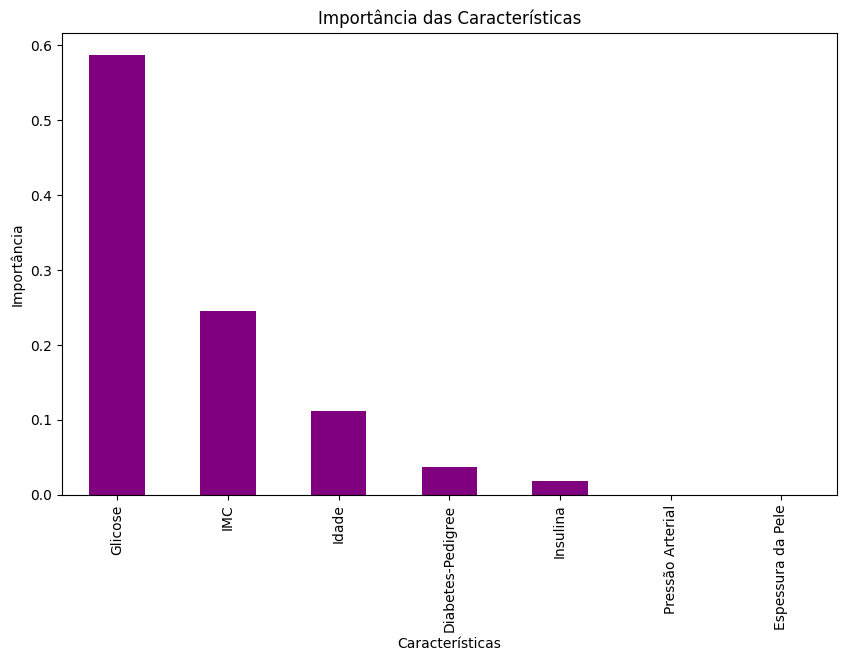

In [ ]:
# importancia das variaseis
nomes_colunas = ["Gravidezes",	"Glicose",	"Pressão Arterial", "Espessura da Pele",	"Insulina",	"IMC",	"Diabetes-Pedigree",	"Idade"]

importancia_variaveis = pd.Series(modelo.feature_importances_, index=nomes_colunas [1:8])
importancia_variaveis = importancia_variaveis.sort_values(ascending=False)
importancia_variaveis.plot(kind='bar', figsize=(10, 6), color = 'purple')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.title('Importância das Características')
plt.show()

#1. Quais sao as variaveis que tem a maior correlacao com o resultado (coluna Resultado)?

Resposta: Glicose.


#2. Qual foi a acuracia em porcentagem deste modelo? E como voce classifica essa acuracia? Justifique.


Resposta: Acuracia bateu 0,75 Indica a proporção de previsões geral do modelo.
 Quanto mais próximo de 1 melhor foi o desempenho. No nosso caso ela chegou em 0,75, não é um valor ruim, mas também esta longe de ser o valor perfeito.

#3. Como interpretar a matriz de confusao? O que significam os valores na diagonal e fora da diagonal?


Resposta: Ela mostra a distribuição das previsões do modelo, sendo assim os valores reais.

Diagonal: Verdadeiro positivos (casos previstos corretamente)
Verdadeiros negativos (valores negativos previstos corrretamente)

Valores fora da diagonal: Falsos positivos (valores previstos negativos de forma errada),
Falsos postitivos (valores previstos negativo de forma erradas).

#4. O que significa uma curva ROC mais proxima do canto superior esquerdo? E o que o valor da AUC nos diz? Qual foi o valor da curva de ROC para esse modelo?


Resposta: O valor mais proximo do canto esquerdo representa que o modelo esta bom, se não muito bom.
Ele nos mostra a capacidade do modelo de distinguir as classes.
O nosso deu em 0,80.

#5. Quais sao as tres variaveis que tem maior impacto no modelo de arvore de decisao? E as tres que tem o menor impacto?


Resposta: As três variáveis que têm maior impacto no modelo de árvore de decisão são:

Glicose,

CMI,

Idade,

As três variáveis que têm menor impacto no modelo de árvore de decisão são:

Espessura da Pele,

Pressão Arterial,

Gravidezes.